<h3><b>Introduction to Data Analytics - Exercise set 4, exercise 3b</b></h3>
<h4><b>Storms dataset</b></h4>

<img src="http://srv.plab.fi/~tuomasv/data_analytics_2023_images/exercise_set_4/hurricane.png" />

<b>Tip:</b> You can just click "Run All" to see the results of this notebook. Some of these exercises have some heavy plots that can take even 1 minute to produce.

<b>Remember:</b> not every dataset has interesting correlations and/or features (too much randomness or variance usually, or not enough data). Also, not each correlation implies there's a causation. Finally, not every plot is useful, that's why it's important to try multiple plots in order to "see under the hood". Typically pair plots, joint plots, regression plots, heatmaps and box plots are most useful, but there are some exceptions too.

<h3><b>Quick summary of data:</b></h3>

<p>This datasets contains data about storms and hurricanes in the Atlantic. The data is from 1975 to 2021. Some older data has missing data. The status -column contains the storm classification, the category is based on Saffir-Simpson hurricane category (N/A, 0-5. 5 is most severe).</p>
<p>This dataset is also split into quantiles by pandas.</p>
<p>Original data: <a href="https://vincentarelbundock.github.io/Rdatasets/doc/dplyr/storms.html">https://vincentarelbundock.github.io/Rdatasets/doc/dplyr/storms.html</a></p>

<h3><b>Questions for this exercise:</b></h3>
<b>Answer the questions either as code comments or as markdown. Use separate cells to write your answers.</b><br/><br/>
<li>What determines a strong hurricane? This information is of course already in the category -column, but there seems to be two columns that define a strong hurricane. What are these variables, and how they seem to correlate with each other in case of a severe hurricane?</li>
<li>Based on the dataset, when is the most active hurricane season (months) in Atlantic?</li>
<li>Which seaborn plots are useful in this notebook, and which are not? Why? (you can remove the unnecessary plots from this notebook if you wish too).</li>
<li>Which are more useful in this case, correlations or plots? Or are they both useful?</li>

<b>Extra questions/tasks for extra points:</b>
<li>Based on this dataset, which hurricanes in this dataset seem to be strongest, and what were they called? (use Google). Note that actual statistics might differ from this dataset, since this dataset is only a sample of observations. (tip: in addition to looking at the seaborn plots, you can also inspect the pandas DataFrames)</li>
<li>The strongest hurricanes in the dataset seem to show a certain behavior when it comes to time. When does this happen (clockwise) and can you find an explanation for this by using Google?</li>
<li>This notebook mostly concentrates on the top 25% hurricanes. Can you find something interesting in the other quantiles?</li>
<li>Any other ideas about this dataset? Any ways to expand or improve the dataset and the analysis?</li>


<hr />

<h4><b>Imports and load the original dataset</b></h4>

In [1]:
# import the common data analytics modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# load dataset
df = pd.read_csv('storms.csv')

# coordinates not needed at this point, remove
df = df.drop('lat', axis=1)
df = df.drop('long', axis=1)

# handle missing values, since seaborn (or machine learning) doesn't work with them

# if category is missing, fill with category 0 (least severe)
df['category'] = df['category'].fillna(0)

# if diameters are missing, fill with 0
df['tropicalstorm_force_diameter'] = df['tropicalstorm_force_diameter'].fillna(0)
df['hurricane_force_diameter'] = df['hurricane_force_diameter'].fillna(0)

# whatever is left with missing data, remove it
df = df.dropna()

# day brings too much variance in the dataset, remove it
df = df.drop('day', axis=1)

# finally, reset index and drop the original index
df = df.reset_index()
df = df.drop('index', axis=1)
del df[df.columns[0]]

# group by name of the hurricane as well as wind and pressure
values = df.groupby('name').sum(numeric_only=True).sort_values(by=['wind', 'pressure'], ascending=False)

# split to quantiles
df_highest = list(values.query('wind >= wind.quantile(q=0.94)').index)
df_average_plus = list(values.query('wind >= wind.quantile(q=0.68) and wind < wind.quantile(q=0.94)').index)
df_average_minus = list(values.query('wind >= wind.quantile(q=0.25) and wind < wind.quantile(q=0.68)').index)
df_lowest = list(values.query('wind < wind.quantile(q=0.25)').index)

# create dataframes based on quantile hurricanes
df1 = df[df['name'].isin(df_highest)]
df2 = df[df['name'].isin(df_average_plus)]
df3 = df[df['name'].isin(df_average_minus)]
df4 = df[df['name'].isin(df_lowest)]

# correlation matrices
correlations = df.corr(numeric_only=True)
correlations1 = df1.corr(numeric_only=True)
correlations2 = df2.corr(numeric_only=True)
correlations3 = df3.corr(numeric_only=True)
correlations4 = df4.corr(numeric_only=True)

<h4><b>seaborn plots - pairplots</b></h4>

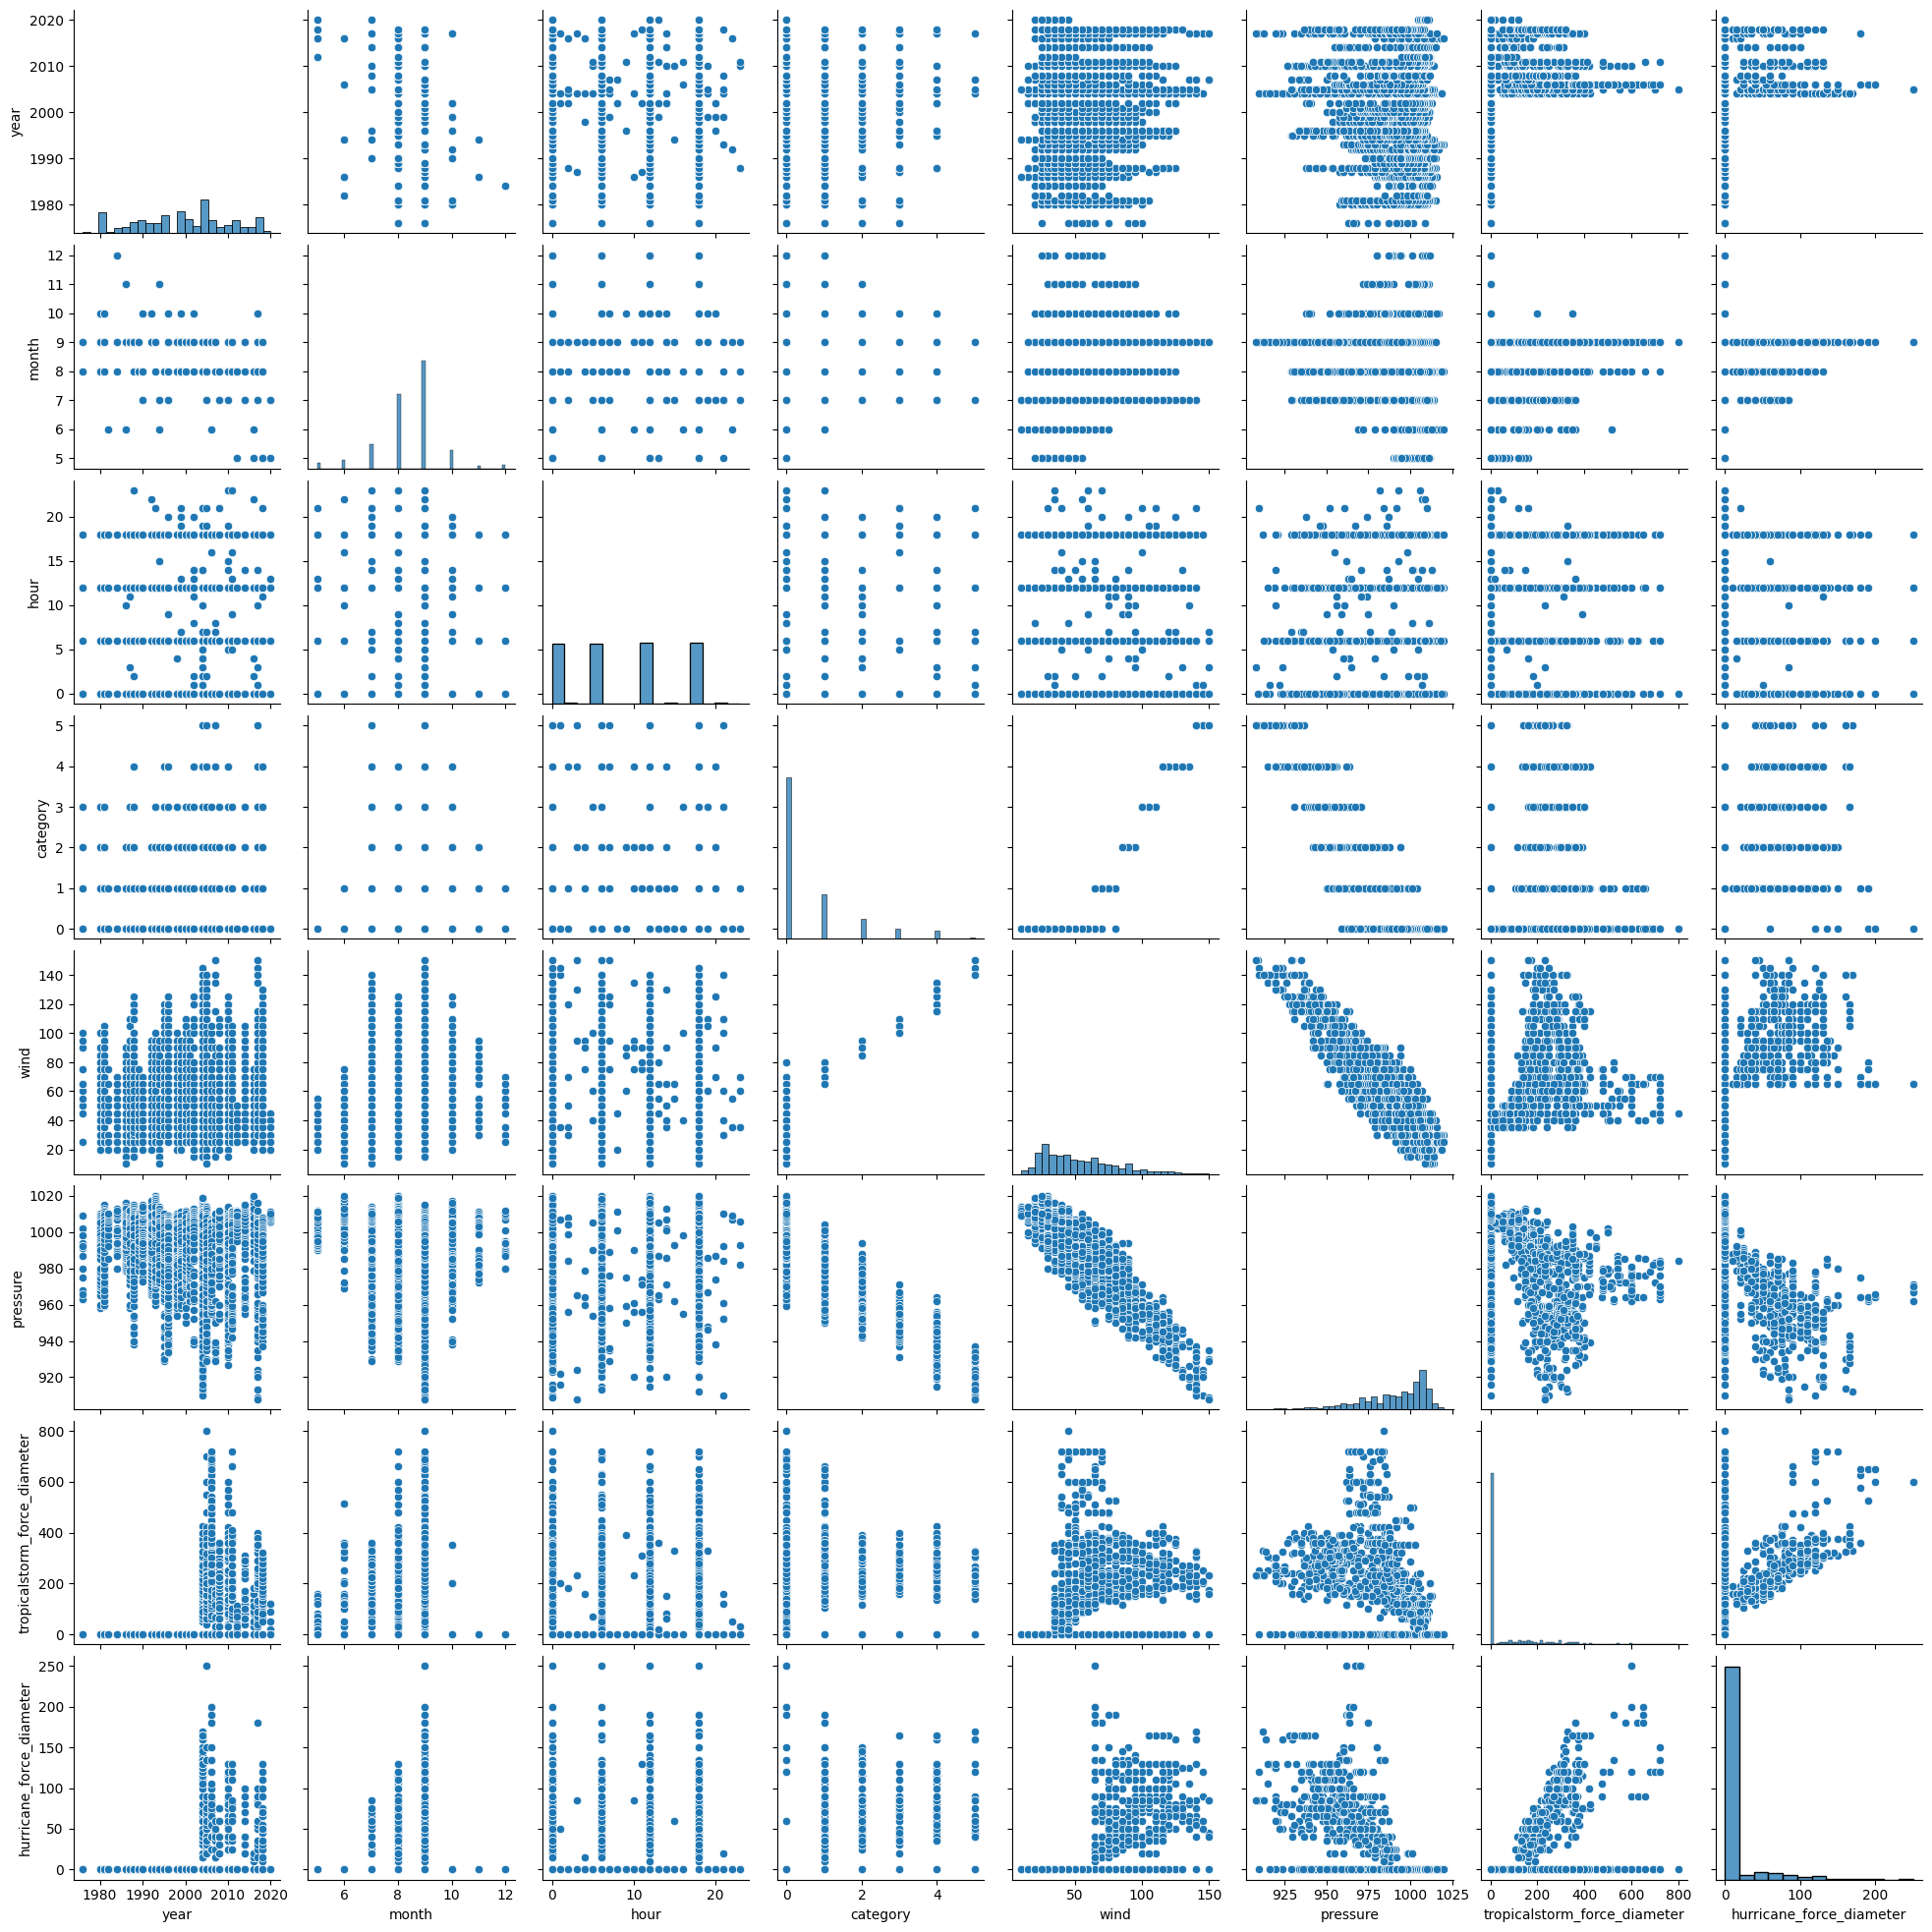

In [3]:
# basic pair plot
sns.pairplot(df1)

# There appears to be an inverse relationship between wind and pressure. 
# It is likely that there is a direct relationship between the diameter of hurricanes at force levels and tropical storms at force levels.
#  However, further investigation is required as the evidence is not entirely conclusive

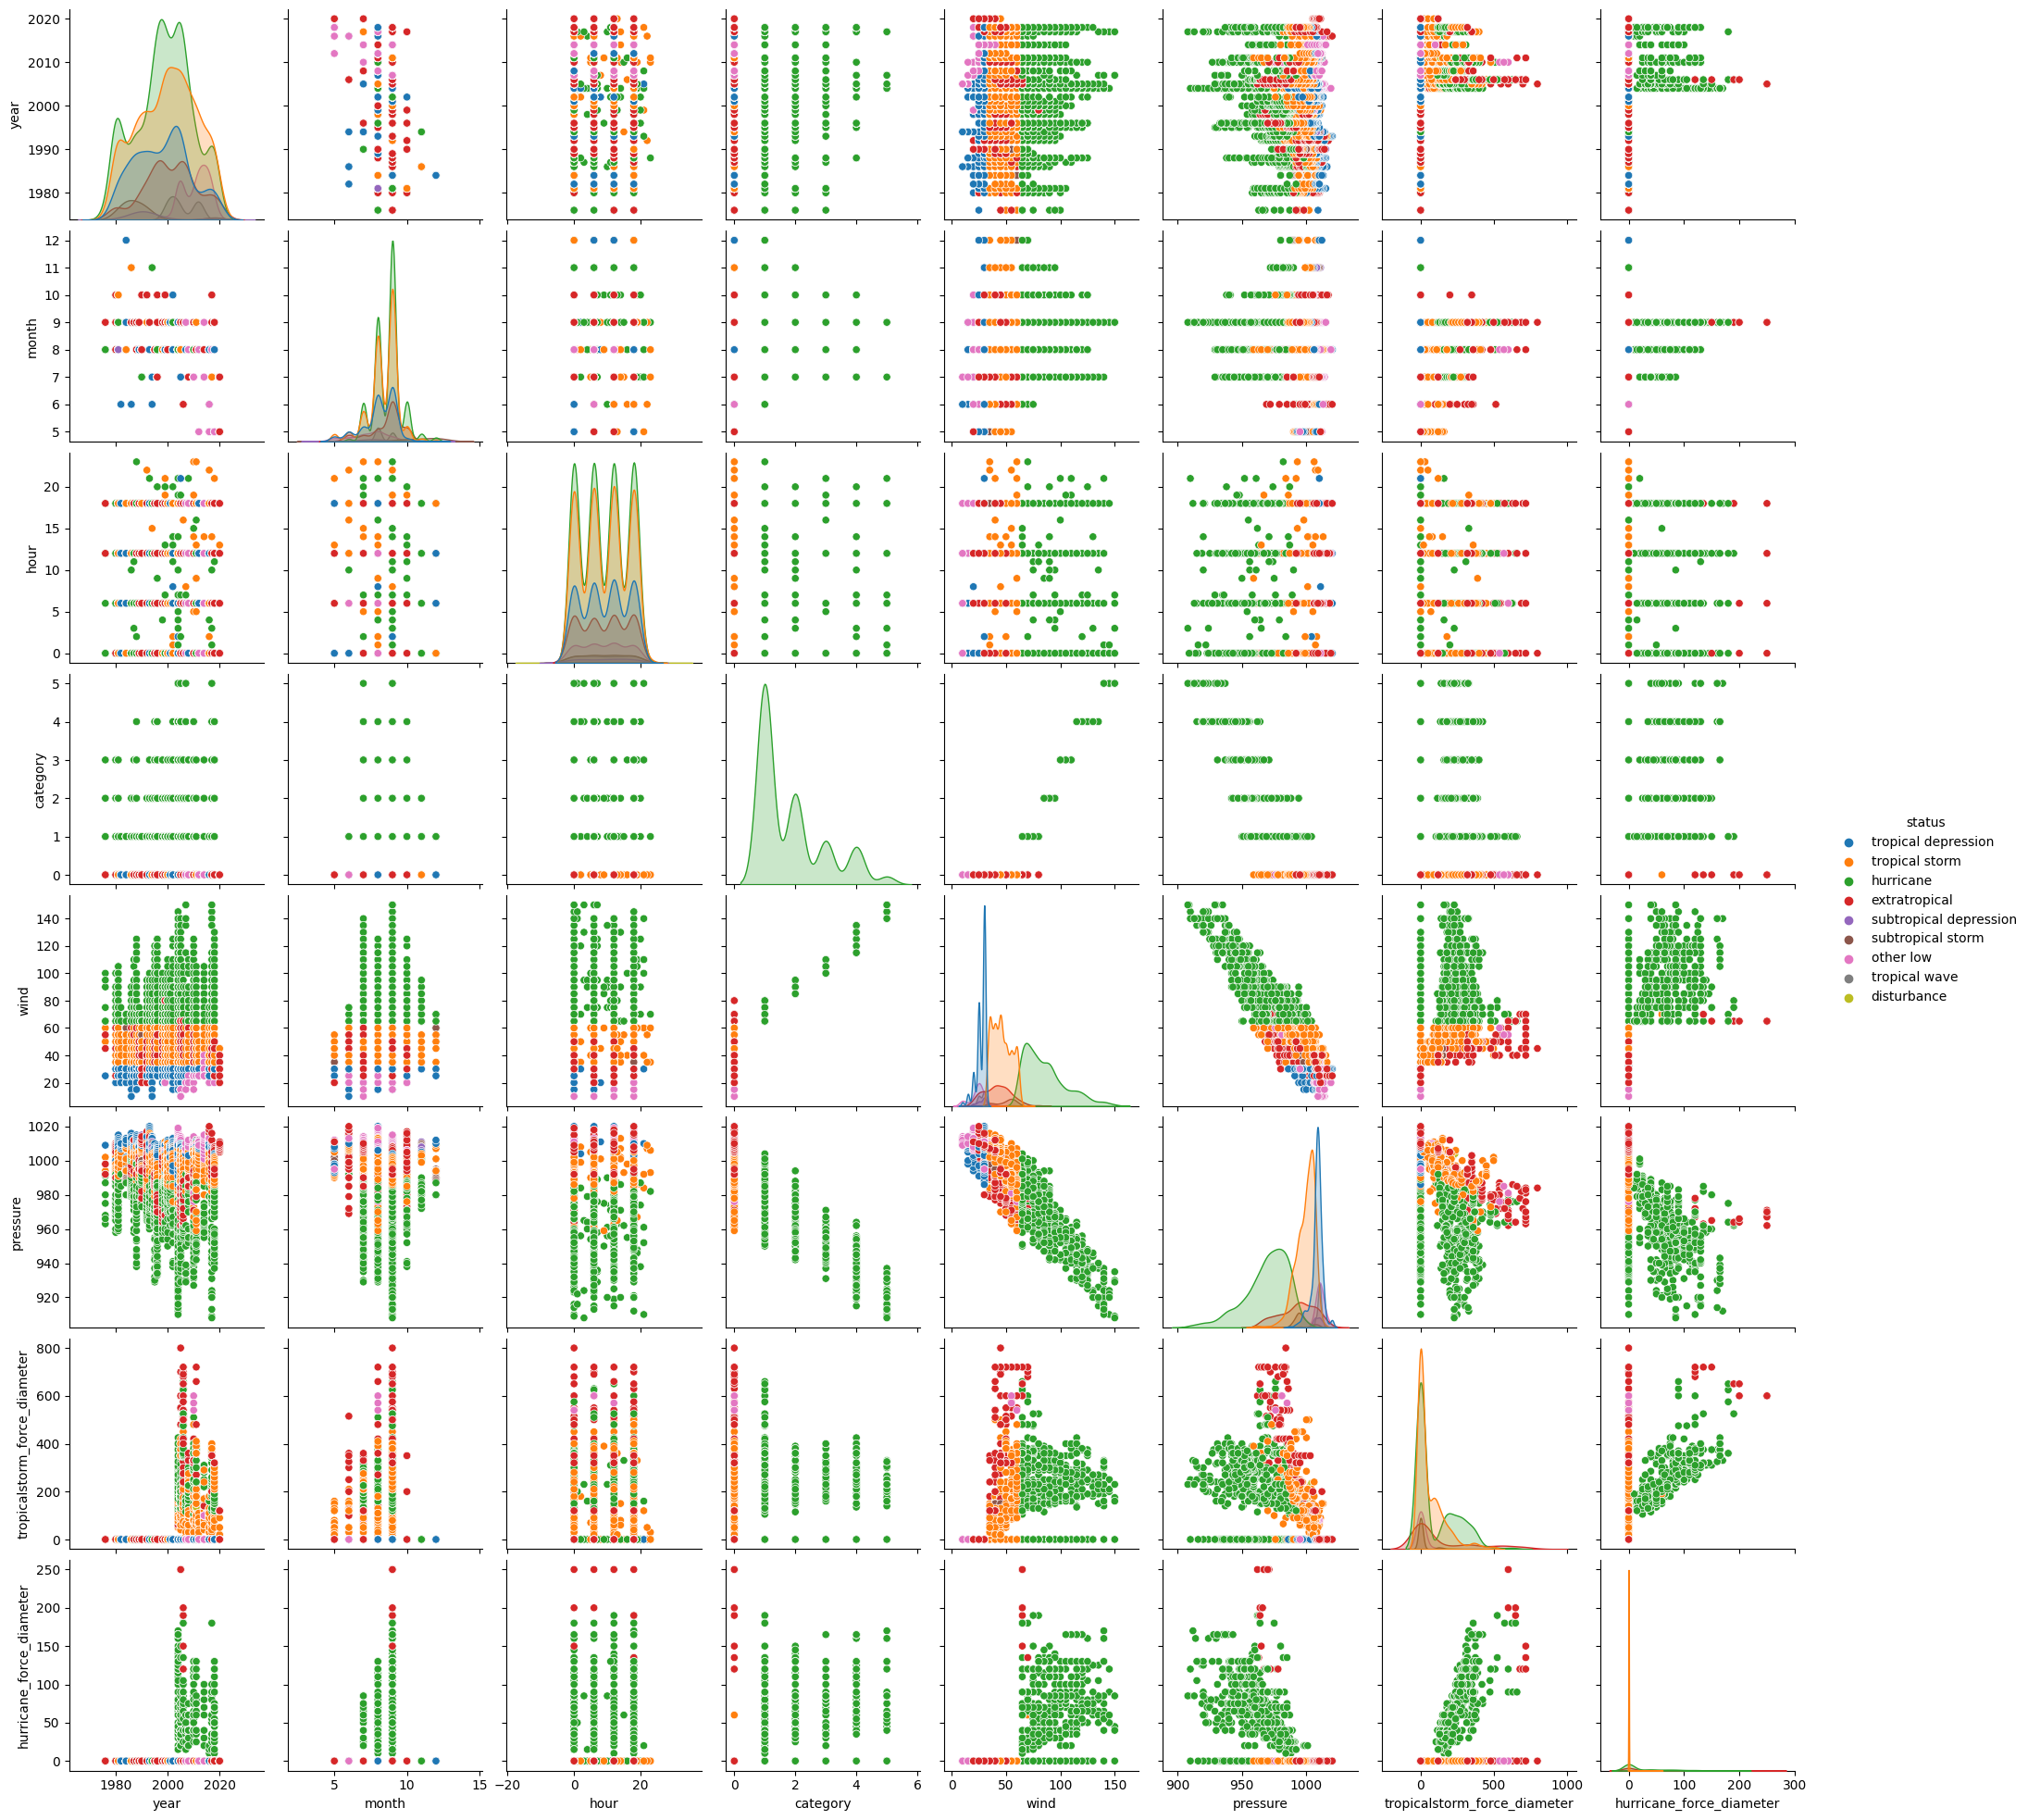

In [4]:
# basic pair plot, hue on status
sns.pairplot(df1, hue="status")

# It is evident that hurricanes are the most prevalent type of storm. 
# In comparison to other storms, hurricanes have lower atmospheric pressure but higher wind speeds.

<h4><b>seaborn plots - heatmaps</b></h4>

<AxesSubplot: xlabel='year', ylabel='month'>

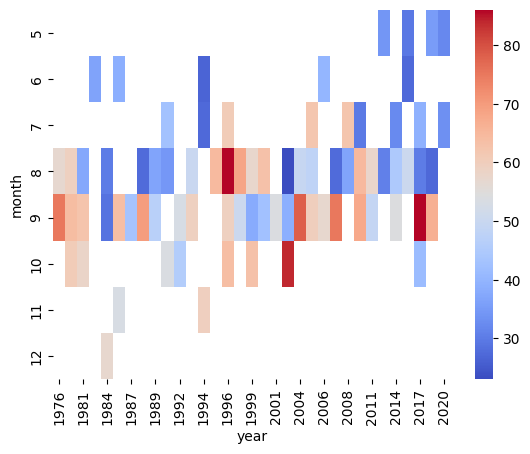

In [5]:
# pivot table + heatmap for month/year and wind
pt = df1.pivot_table(index='month', columns='year', values='wind')
sns.heatmap(pt, cmap='coolwarm')

# From the data, it is evident that there were several instances of strong wind throughout the entire period of observation. 
# Typically, these instances occurred during the months of August, September, or October, with occasional occurrences starting in July.

<AxesSubplot: xlabel='year', ylabel='month'>

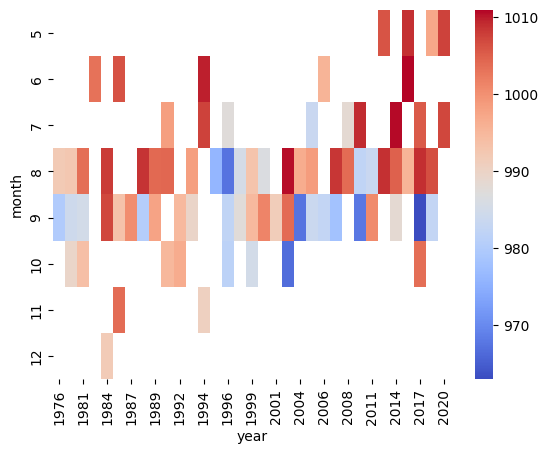

In [6]:
# pivot table + heatmap for month/year and pressure
pt = df1.pivot_table(index='month', columns='year', values='pressure')
sns.heatmap(pt, cmap='coolwarm')

# According to the data, high pressure conditions typically begin in May and can persist until December. 
# However, these high pressure conditions generally tend to subside by October.

<AxesSubplot: xlabel='hour', ylabel='month'>

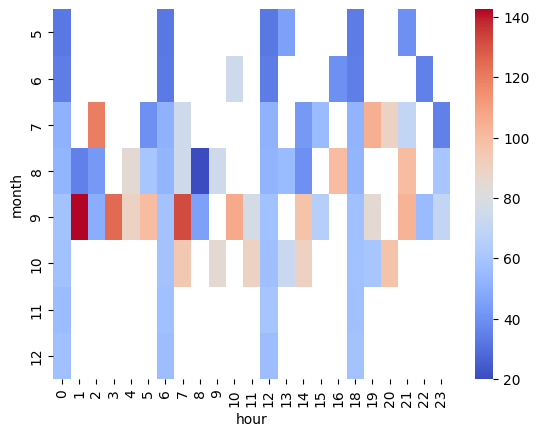

In [7]:
# pivot table + heatmap for month/year and wind
pt = df1.pivot_table(index='month', columns='hour', values='wind')
sns.heatmap(pt, cmap='coolwarm')

# The data suggests that the strongest winds occur during the nighttime in October. 
# However, it is also possible for the wind to be very strong during the daytime.

<AxesSubplot: xlabel='hour', ylabel='month'>

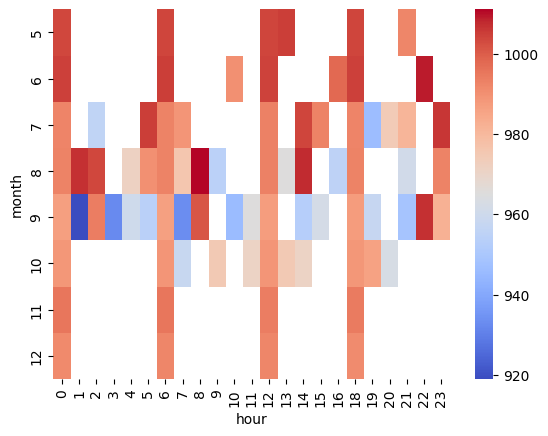

In [8]:
# pivot table + heatmap for month/year and pressure
pt = df1.pivot_table(index='month', columns='hour', values='pressure')
sns.heatmap(pt, cmap='coolwarm')

# The data indicates that high atmospheric pressure typically begins in May and follows a diurnal pattern, 
# during the day. Furthermore, there is no month without instances of high pressure being recorded.

<h4><b>seaborn plots - regression plots</b></h4>

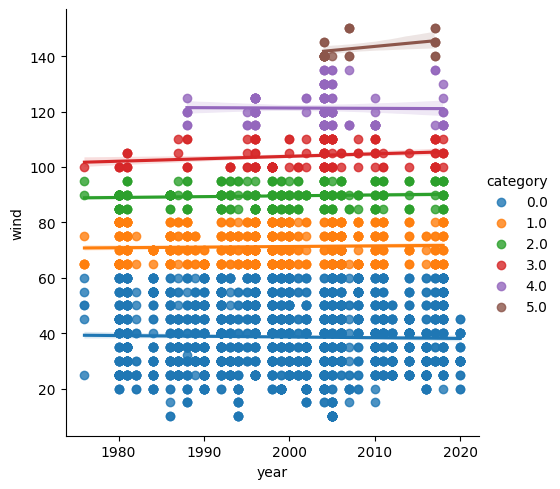

In [9]:
# regression plot for wind/year, hue on category
sns.lmplot(x='year', y='wind', data=df1, hue='category')

# As per the data description, higher storm category corresponds to higher wind speeds.
#  The data suggests that wind speeds have increased over the last few decades.

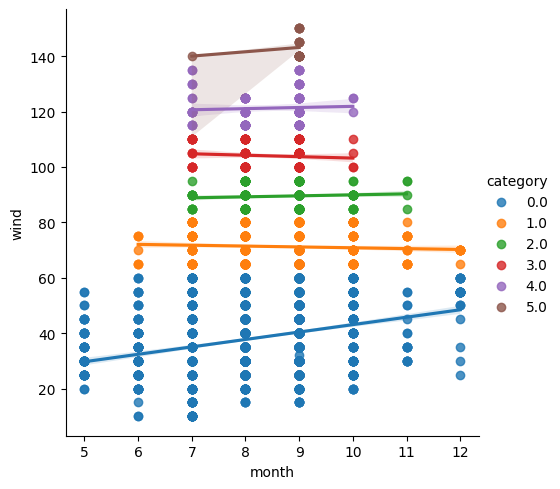

In [22]:
# regression plot for wind/month, hue on category
sns.lmplot(x='month', y='wind', data=df1, hue='category')

# Based on the data, the highest storm categories are typically observed in July and September, 
# with the second-highest storm categories being observed in August and October.

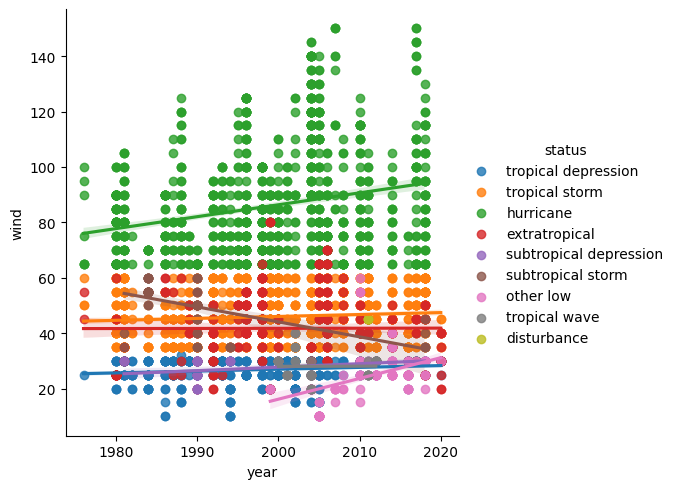

In [11]:
# regression plot for wind/year, hue on status
sns.lmplot( x='year', y='wind', data=df1, hue='status')

# According to the data, hurricanes are the most powerful and dangerous storms due to their high wind speeds. Moreover, 
# the data suggests that the danger associated with hurricanes is increasing decade by decade due to the increasing wind speeds.

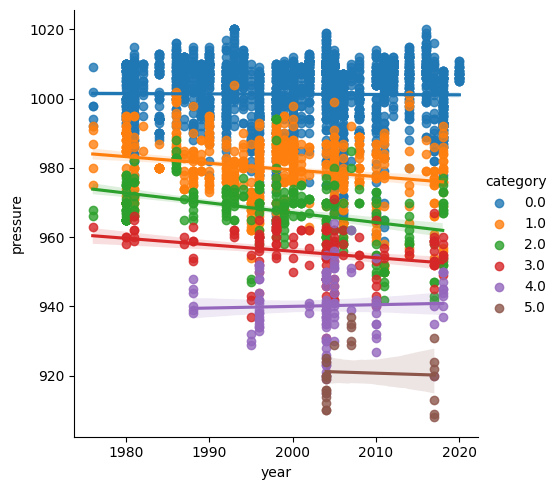

In [23]:
# regression plot for pressure/year, hue on category
sns.lmplot(x='year', y='pressure', data=df1, hue='category')

# As I remember from national geographic tv chanal pressure become lower in storm area,
# this data approve it

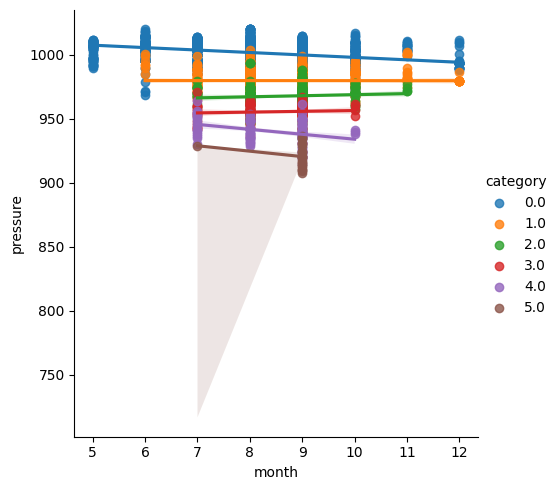

In [13]:
# regression plot for pressure/month, hue on category
sns.lmplot(x='month', y='pressure', data=df1, hue='category')

# The data indicates that the months of July and September are typically associated with high atmospheric pressure. 
# The second-highest occurrences of high pressure are observed in August and October.

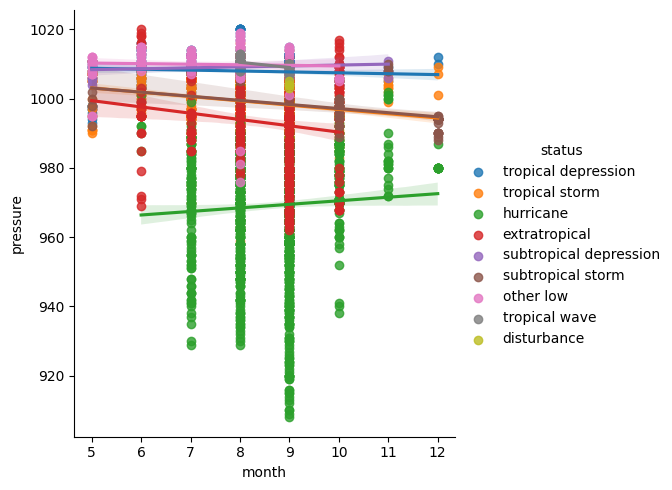

In [14]:
# regression plot for pressure_month, hue on status
sns.lmplot(x='month', y='pressure', data=df1, hue='status')

# Based on the data, hurricanes are the most frequently occurring type of storm.

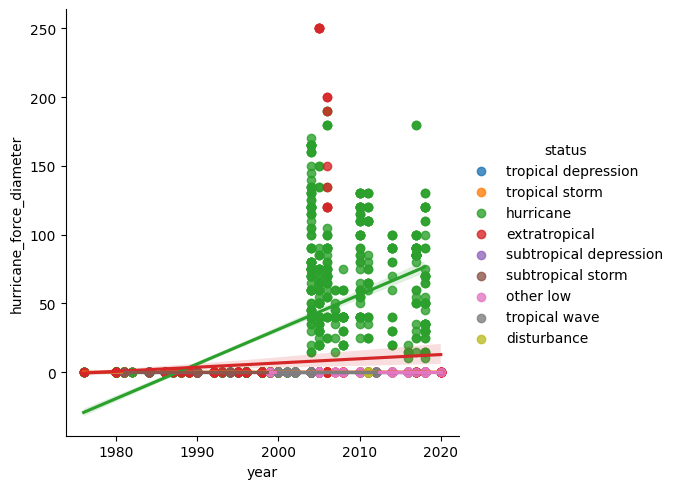

In [15]:
# regression plot for hurricane force diameter and year, hue on status
sns.lmplot(x='year', y='hurricane_force_diameter', data=df1, hue='status')

# unuseful plot, not clear data

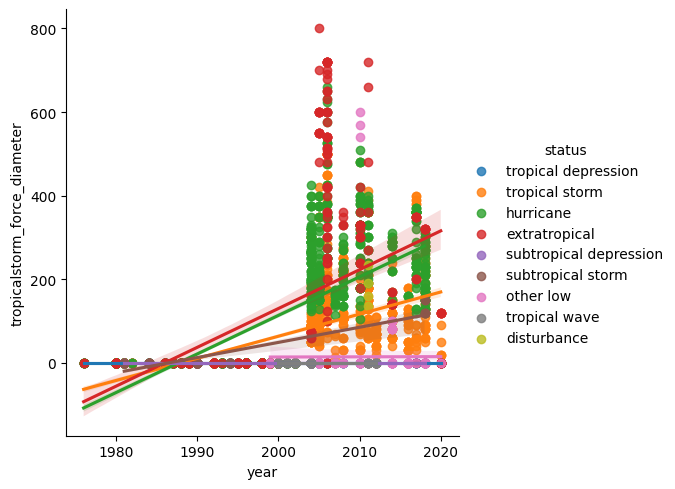

In [16]:
# regression plot for tropical storm diameter and year, hue on status
sns.lmplot(x='year', y='tropicalstorm_force_diameter', data=df1, hue='status')

# unuseful plot, not clear data

<h4><b>seaborn plots - boxplots</b></h4>

<AxesSubplot: xlabel='category', ylabel='wind'>

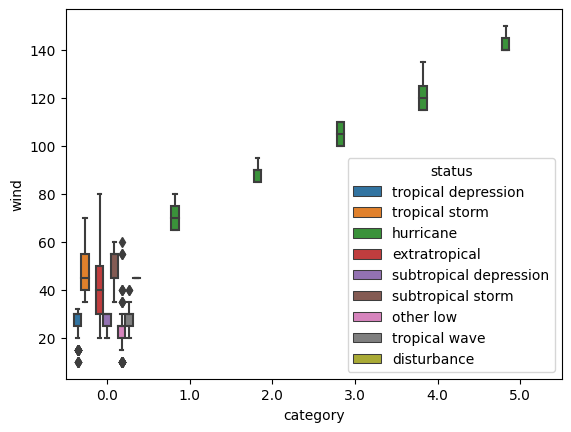

In [17]:
# boxplot, category/wind, hue on status
sns.boxplot(x='category', y='wind', data=df1, hue='status')

# Only hurricane has wind more than 85 

<AxesSubplot: xlabel='category', ylabel='pressure'>

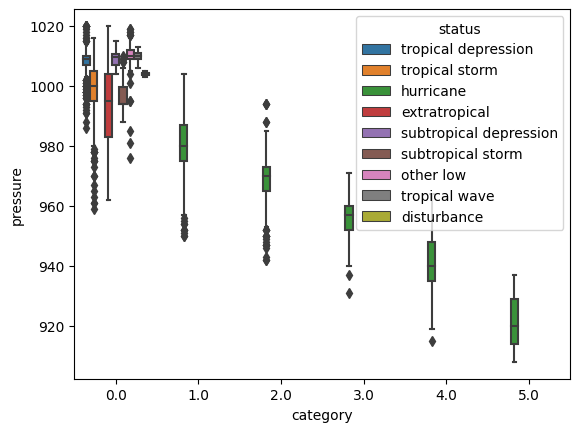

In [18]:
# boxplot, category/pressure, hue on status
sns.boxplot(x='category', y='pressure', data=df1, hue='status')

# Only hurricane has lowest value of pressure 

<AxesSubplot: xlabel='category', ylabel='hurricane_force_diameter'>

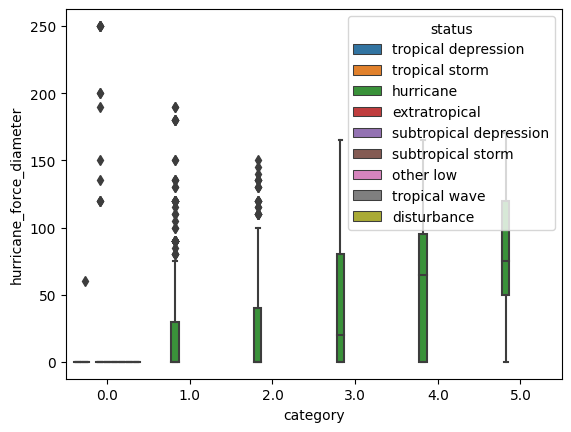

In [19]:
# boxplot, category/hurricane force diameter, hue on status
sns.boxplot(x='category', y='hurricane_force_diameter', data=df1, hue='status')

# here is same leader

<h4><b>seaborn plots - heatmaps for correlations matrices</b></h4>

<AxesSubplot: >

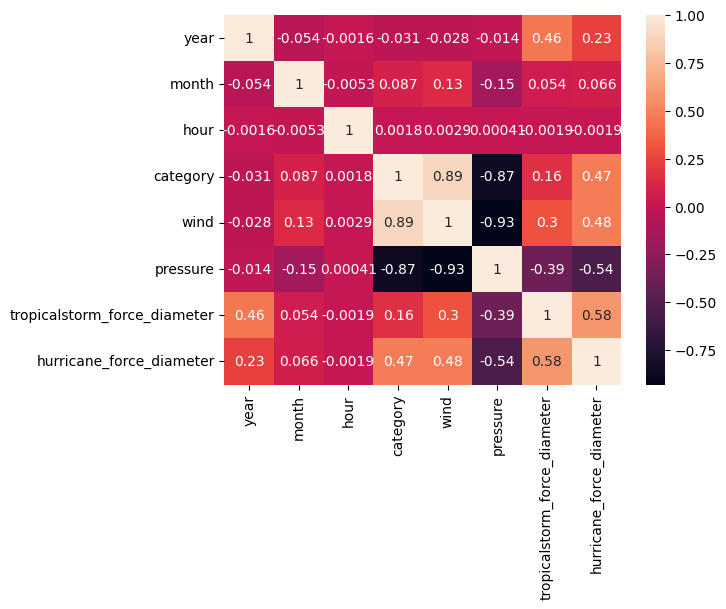

In [20]:
# correlation matrix heatmap, whole dataset
sns.heatmap(correlations, annot=True)

# unusefull plot

<AxesSubplot: >

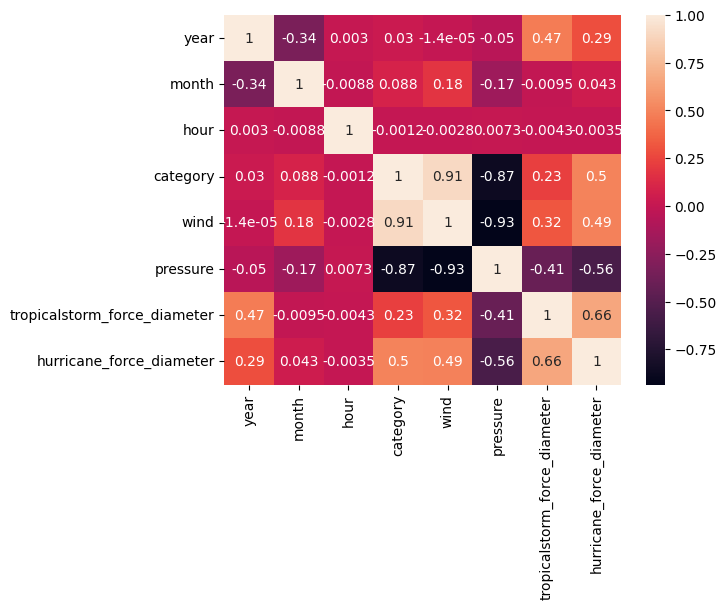

In [21]:
# correlation matrix heatmap for top hurricanes
sns.heatmap(correlations1, annot=True)

# same unusefull plot